# Suggesting for Ewing's Sarcoma
----- 
- Date : 19th May 2019
- using R3.5 kernal
- on 89

In [1]:
source("~/bin/da.R")

In [2]:
suppressPackageStartupMessages({
    library(vcd)
    library(readr)
    library(maftools)
    library(corrplot)
    library(knitr)
    library(wordcloud)
    library(RColorBrewer)})

In [3]:
packageVersion("maftools")

[1] ‘1.8.0’

## Muataional Data

In [4]:
file_name="../KCPG_Variants/data/Mutation_data_cleaned_051019.xls"

In [5]:
df= readxl::read_excel(file_name)

In [6]:
df %>% dim

[1] 3016   84

In [7]:
knitr::kable( sort( table(df$Tumor_types ),decreasing = T), format="pandoc")



Var1     Freq
------  -----
CNS       613
WLM       405
NBL       343
RHB       259
OS        241
HGG       229
RB        221
EWS       192
STS       177
GCT       139
ACT        79
LGG        52
CA         35
OST        18
RCC         5
GICT        2
LMPRT       2
PGL         2
BCC         1
NM          1

In [8]:
cbind( df$Known_Cancer_Predisposition_Genes %>% table )

known,290
suggesting,2726


In [9]:
df = df[df$Known_Cancer_Predisposition_Genes == 'suggesting',]
df =droplevels(df)

In [10]:
df%>% dim

[1] 2726   84

In [11]:
table(df$genotype)


    Het Het-Alt     Hom 
   2710       8       8 

In [12]:
# sanity check
df$Mode_of_Inheritance_abb %>% table

< table of extent 0 >

In [13]:
len( unique(df$Tumor_Sample_Barcode) )

[1] 1273

In [14]:
len( unique(df$Hugo_Symbol) )

[1] 1175

## EDA Clinical_Data

In [15]:
file_name_clinical = "../KCPG_Variants/data/Combined_Clinical_Data_03.xlsx"

In [16]:
df2 = readxl::read_excel( file_name_clinical )

In [17]:
colnames(df2)

[1] "Tumor_Sample_Barcode" "Tumor_type"           "Tumor_type2"         
 [4] "Age_of_Onset"         "Sex"                  "Age_group"           
 [7] "sample_type"          "sequencing_type"      "Access_unit"         
[10] "Status"               "Ethnicity"            "Race"

In [18]:
table(df2$Tumor_type , df2$Access_unit )

                                      
                                       CCF PCGP SJLIFE
  Adrenocortical Carcinoma               1   19      2
  Basal Cell Carcinoma                   0    0      1
  Carcinoma                              0    0     14
  Central Nervous System                 1    0    322
  Ewing's Sarcoma                        6    0     89
  Germ Cell Tumor                        1    0     73
  Giant Cell Tumor                       0    0      3
  High Grade Glioma                      5   75      0
  Low Grade Glioma                       2   15      7
  Low Malignant Potential Renal Tumors   2    0      0
  Neuroblastoma                          3   48    139
  Non-Malignant Tumor                    1    0      3
  Osteosarcoma                          14    2    113
  Other Solid Tumor                      0    0     10
  Paraganglioma                          0    0      1
  Renal Cell Carcinoma                   1    0      2
  Retinoblastoma          

In [19]:
fct_count( df2$Tumor_type , sort = T)

f,n
Central Nervous System,323
Wilms' tumor,207
Neuroblastoma,190
Rhabdomyosarcoma,134
Osteosarcoma,129
Retinoblastoma,98
Ewing's Sarcoma,95
Soft Tissue Sarcoma,93
High Grade Glioma,80
Germ Cell Tumor,74


In [20]:
## sanity check
table(df2$Tumor_type , df2$Tumor_type2 )

                                      
                                       ACT BCC  CA CNS EWS GCT GICT HGG LGG
  Adrenocortical Carcinoma              22   0   0   0   0   0    0   0   0
  Basal Cell Carcinoma                   0   1   0   0   0   0    0   0   0
  Carcinoma                              0   0  14   0   0   0    0   0   0
  Central Nervous System                 0   0   0 323   0   0    0   0   0
  Ewing's Sarcoma                        0   0   0   0  95   0    0   0   0
  Germ Cell Tumor                        0   0   0   0   0  74    0   0   0
  Giant Cell Tumor                       0   0   0   0   0   0    3   0   0
  High Grade Glioma                      0   0   0   0   0   0    0  80   0
  Low Grade Glioma                       0   0   0   0   0   0    0   0  24
  Low Malignant Potential Renal Tumors   0   0   0   0   0   0    0   0   0
  Neuroblastoma                          0   0   0   0   0   0    0   0   0
  Non-Malignant Tumor                    0   0   

In [21]:
## sanity check
df %>% dim
df2 %>% dim

[1] 2726   84

[1] 1507   12

In [22]:
ttype ="Ewing's Sarcoma"

In [23]:
df2_ss = df2[df2$Tumor_type == ttype,]
ss =df$Tumor_Sample_Barcode %in% intersect( df$Tumor_Sample_Barcode, unique( df2_ss$Tumor_Sample_Barcode ))
df_ss = df[ ss, ]
df_ss = droplevels(df_ss)
df2_ss = droplevels(df2_ss)

In [24]:
df_ss$Hugo_Symbol=as.character(df_ss$Hugo_Symbol) 

In [25]:
table(df2_ss$Tumor_type , df2_ss$Tumor_type2 )

                 
                  EWS
  Ewing's Sarcoma  95

In [26]:
setdiff( df_ss$Tumor_Sample_Barcode, df2_ss$Tumor_Sample_Barcode)

character(0)

In [27]:
cbind(dim(df_ss), dim(df2_ss))

181,95
84,12


## Creating a MAF object

In [28]:
dfx = read.maf(maf=df_ss,clinicalData = df2_ss , isTCGA = FALSE, verbose = T, removeDuplicatedVariants = FALSE, useAll = TRUE )

silent variants: 2


        ID N
1: Samples 2
2: 5'Flank 2


Summarizing..
NOTE: Mutiple reference builds found!
37;38


                   ID summary  Mean Median
 1:        NCBI_Build   37;38    NA     NA
 2:            Center    <NA>    NA     NA
 3:           Samples      81    NA     NA
 4:            nGenes     161    NA     NA
 5:   Frame_Shift_Del       8 0.099      0
 6:   Frame_Shift_Ins       6 0.074      0
 7:      In_Frame_Del       4 0.049      0
 8: Missense_Mutation      88 1.086      1
 9: Nonsense_Mutation      44 0.543      0
10:       Splice_Site      29 0.358      0
11:             total     179 2.210      2


Gene Summary..


     Hugo_Symbol Frame_Shift_Del Frame_Shift_Ins In_Frame_Del Missense_Mutation
  1:       MCPH1               0               0            0                 0
  2:         PAH               0               0            0                 3
  3:         TTN               0               0            0                 3
  4:        ASS1               0               0            0                 2
  5:       DDHD2               1               0            0                 0
 ---                                                                           
157:       VPS53               0               0            0                 0
158:       WDR11               0               0            0                 1
159:       WDR62               1               0            0                 0
160:        YARS               0               0            0                 0
161:      ZNF469               0               0            0                 1
     Nonsense_Mutation Splice_Site total

NOTE: Possible FLAGS among top ten genes:


[1] "TTN"


Checking clinical data..
Done !


In [29]:
dfx@summary

ID,summary,Mean,Median
NCBI_Build,37;38,NA,NA
Center,NA,NA,NA
Samples,81,NA,NA
nGenes,161,NA,NA
Frame_Shift_Del,8,0.099,0
Frame_Shift_Ins,6,0.074,0
In_Frame_Del,4,0.049,0
Missense_Mutation,88,1.086,1
Nonsense_Mutation,44,0.543,0
Splice_Site,29,0.358,0


In [30]:
dfx@gene.summary %>% head

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
MCPH1,0,0,0,0,2,1,3,3,3
PAH,0,0,0,3,0,0,3,3,3
TTN,0,0,0,3,0,0,3,2,2
ASS1,0,0,0,2,0,0,2,2,2
DDHD2,1,0,0,0,1,0,2,2,2
EYS,0,0,0,1,0,1,2,2,2


# Number of unique genes after making MAF file

In [31]:
dfx@gene.summary %>% dim

[1] 161  10

### Samples with top variants

In [32]:
knitr::kable( dfx@variant.type.summary %>% head,format = "pandoc")



Tumor_Sample_Barcode    DEL   INS   SNP   total
---------------------  ----  ----  ----  ------
SJEWS019202               1     0     5       6
SJEWS019201               0     0     5       5
SJEWS019214               1     0     4       5
SJEWS042485               0     0     5       5
CCF12040                  0     0     4       4
SJEWS018607               0     1     3       4

In [33]:
knitr::kable( dfx@variants.per.sample %>% head,format = "pandoc")



Tumor_Sample_Barcode    Variants
---------------------  ---------
SJEWS019202                    6
SJEWS019201                    5
SJEWS019214                    5
SJEWS042485                    5
CCF12040                       4
SJEWS018607                    4

### Number of Genes with 2 or more mutations

In [34]:
gs = as.data.frame( dfx@gene.summary )  
gf_sx = nrow( gs[ gs$MutatedSamples >= 2,] )
gf_sx

[1] 14

In [35]:
total_genes=length(gs$Hugo_Symbol)

In [36]:
total_genes

[1] 161

In [37]:
gs %>% head

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,Missense_Mutation,Nonsense_Mutation,Splice_Site,total,MutatedSamples,AlteredSamples
MCPH1,0,0,0,0,2,1,3,3,3
PAH,0,0,0,3,0,0,3,3,3
TTN,0,0,0,3,0,0,3,2,2
ASS1,0,0,0,2,0,0,2,2,2
DDHD2,1,0,0,0,1,0,2,2,2
EYS,0,0,0,1,0,1,2,2,2


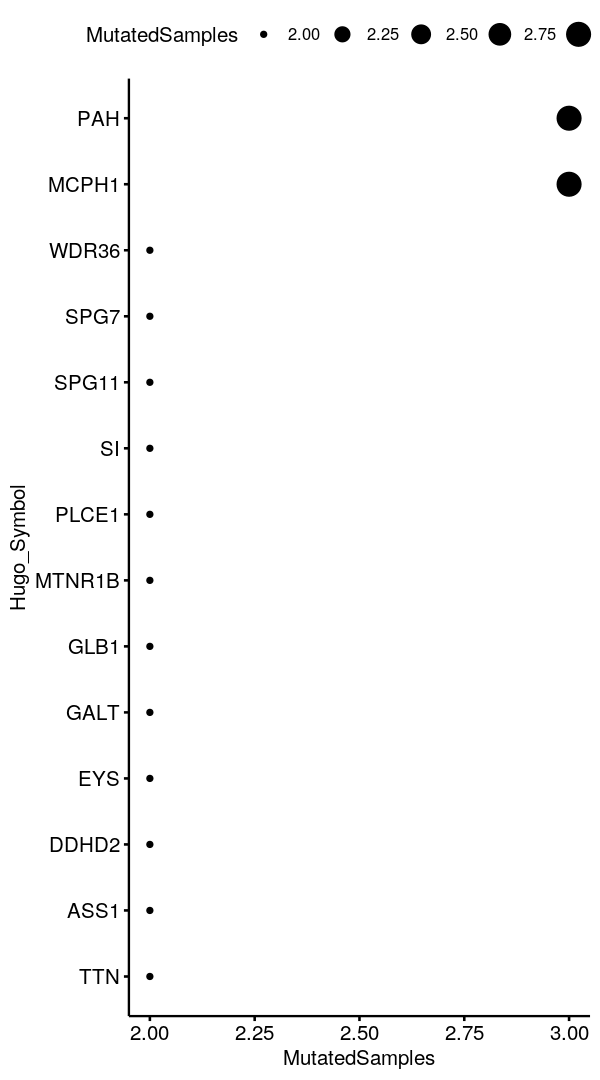

In [38]:
options(repr.plot.width=5, repr.plot.height=9)
gs[ gs$MutatedSamples >= 2,] %>% ggdotchart("Hugo_Symbol","MutatedSamples", 
                  rotate = TRUE,
                  sorting = "descending",
                  show.label = F,size = "MutatedSamples", 
                  ggtheme = theme_pubr() )

### plotmafSummary
to plot the summary of the maf file, which displays number of variants in each sample as a stacked barplot and variant types as a boxplot summarized by Variant_Classification.

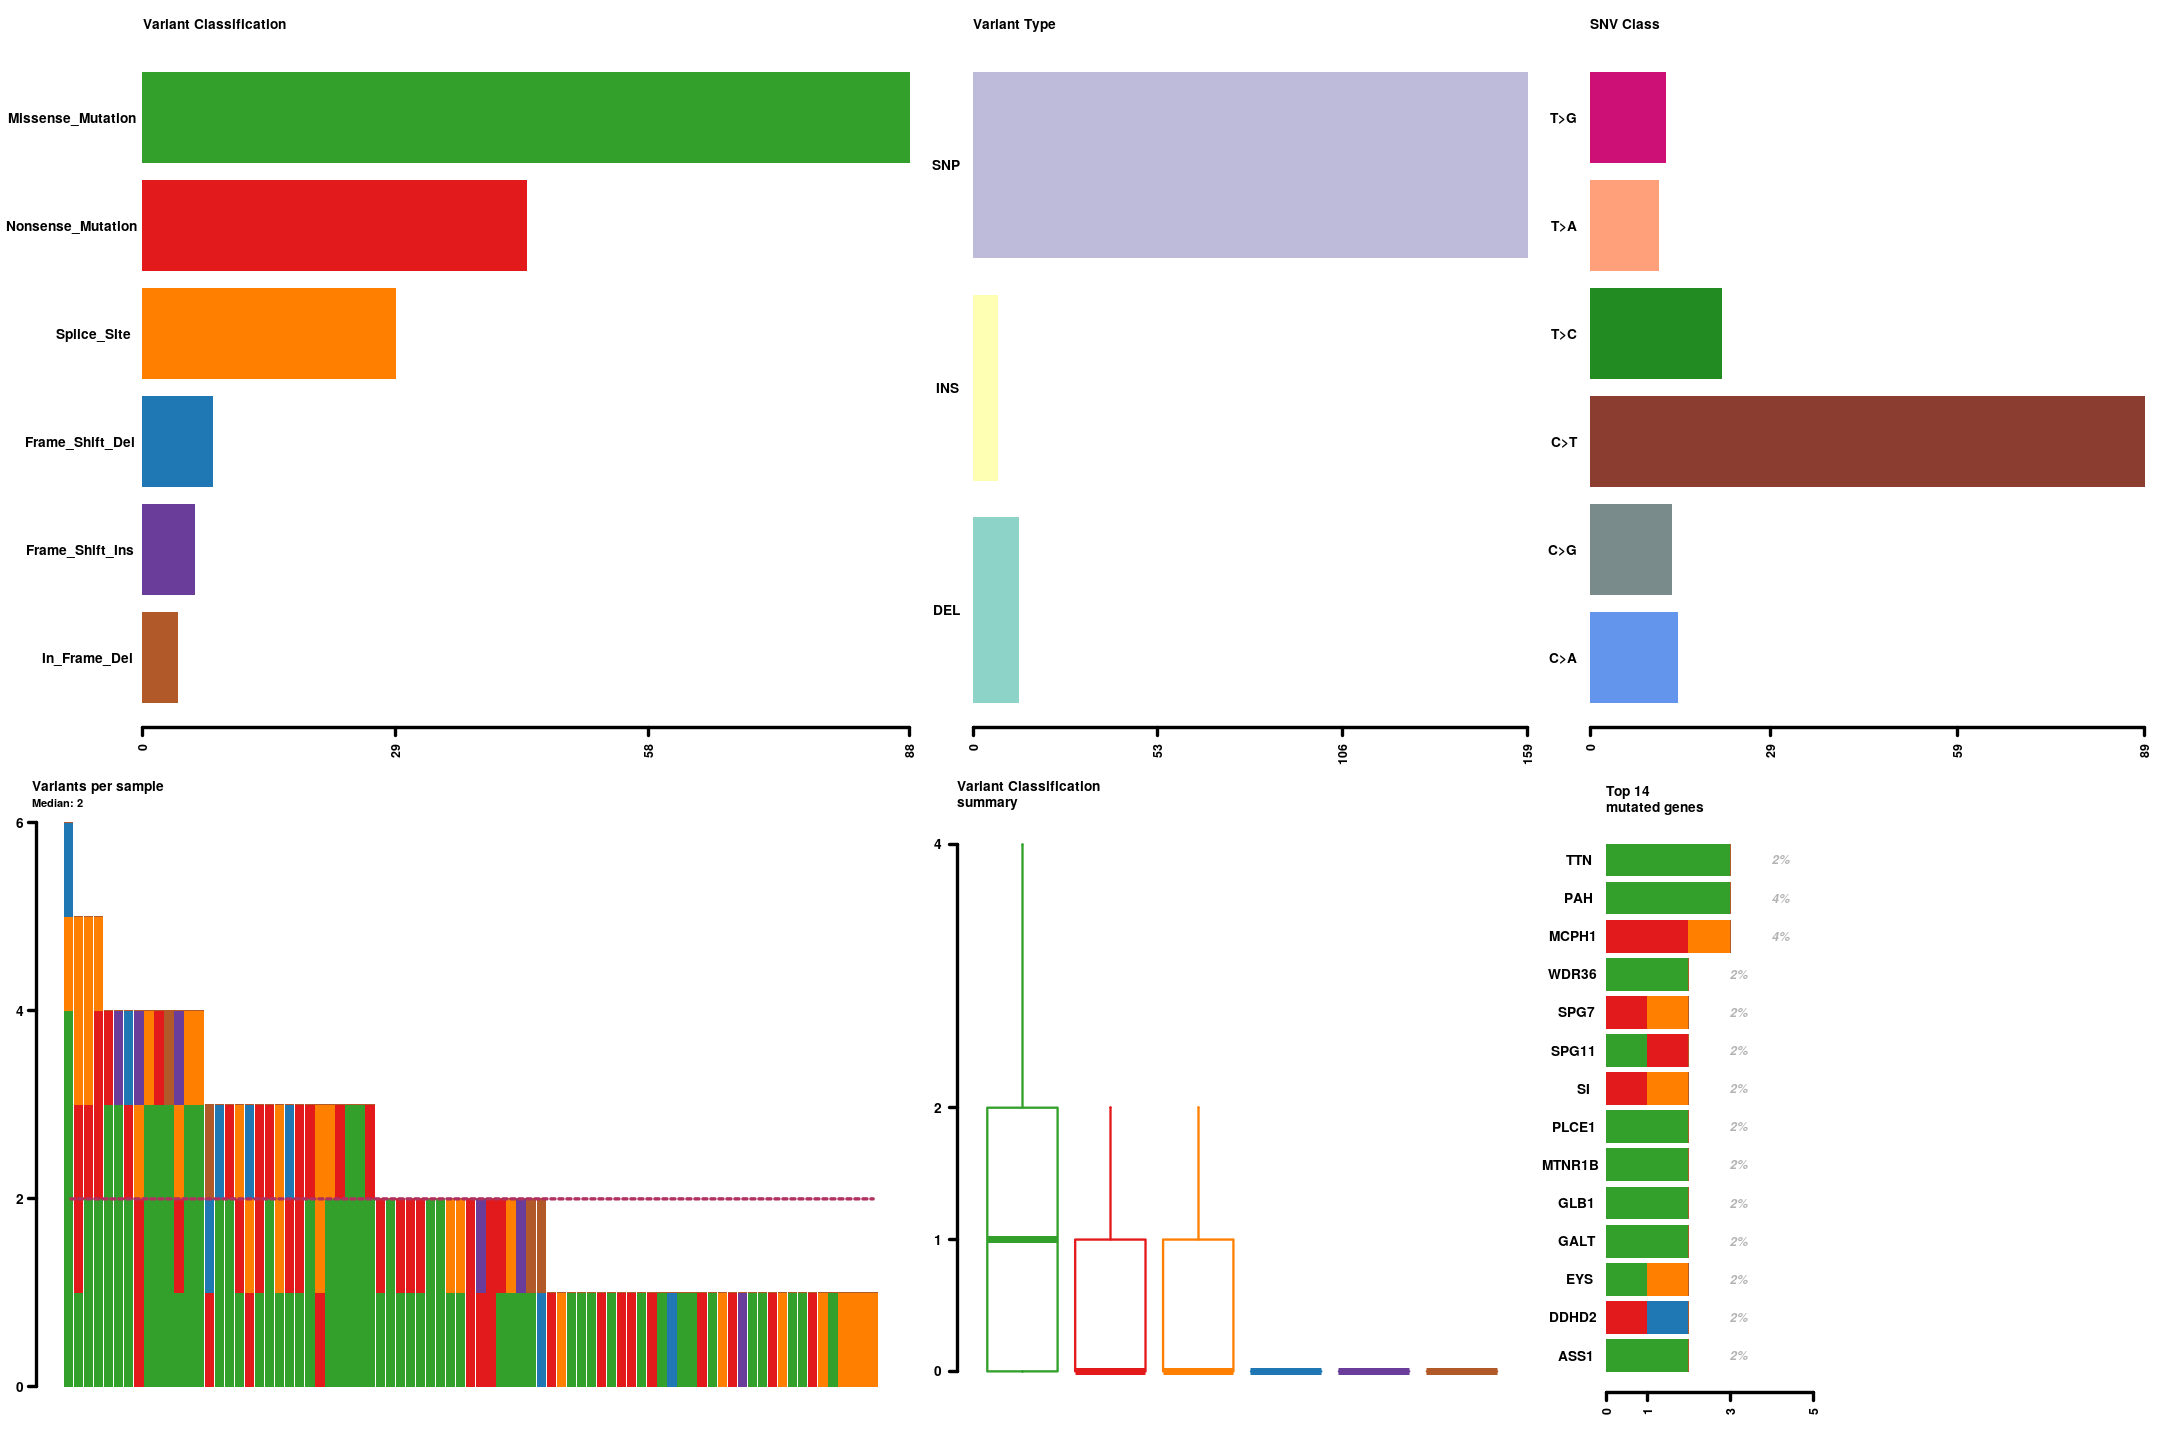

In [41]:
options(repr.plot.width=18, repr.plot.height=12)
plotmafSummary(maf=dfx, rmOutlier=F ,dashboard=TRUE,addStat='median', textSize=2,top=gf_sx, showBarcodes=F )

In [42]:
options(repr.plot.width=12, repr.plot.height=9)
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_plotmafsummary_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=12, width=18)
plotmafSummary(maf=dfx, rmOutlier=F ,dashboard=TRUE,addStat='median', textSize=2,top=gf_sx, showBarcodes=F )
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_plotmafsummary_01.svg"

png 
  2

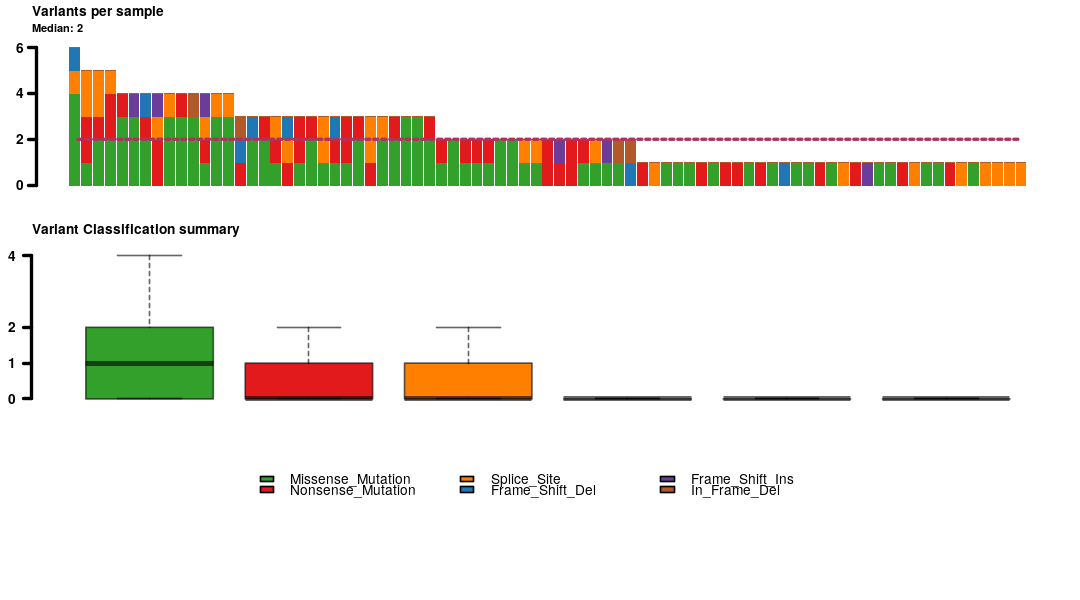

In [43]:
options(repr.plot.width=9, repr.plot.height=5)
plotmafSummary(maf = dfx, rmOutlier = FALSE ,dashboard = F,addStat = 'median', textSize = 2, top = gf_sx, showBarcodes=F )

### Oncoplots or waterfall plots
- Adding Clinical Data on oncoplot

### Make Oncoplots with the total genes from the gene summary

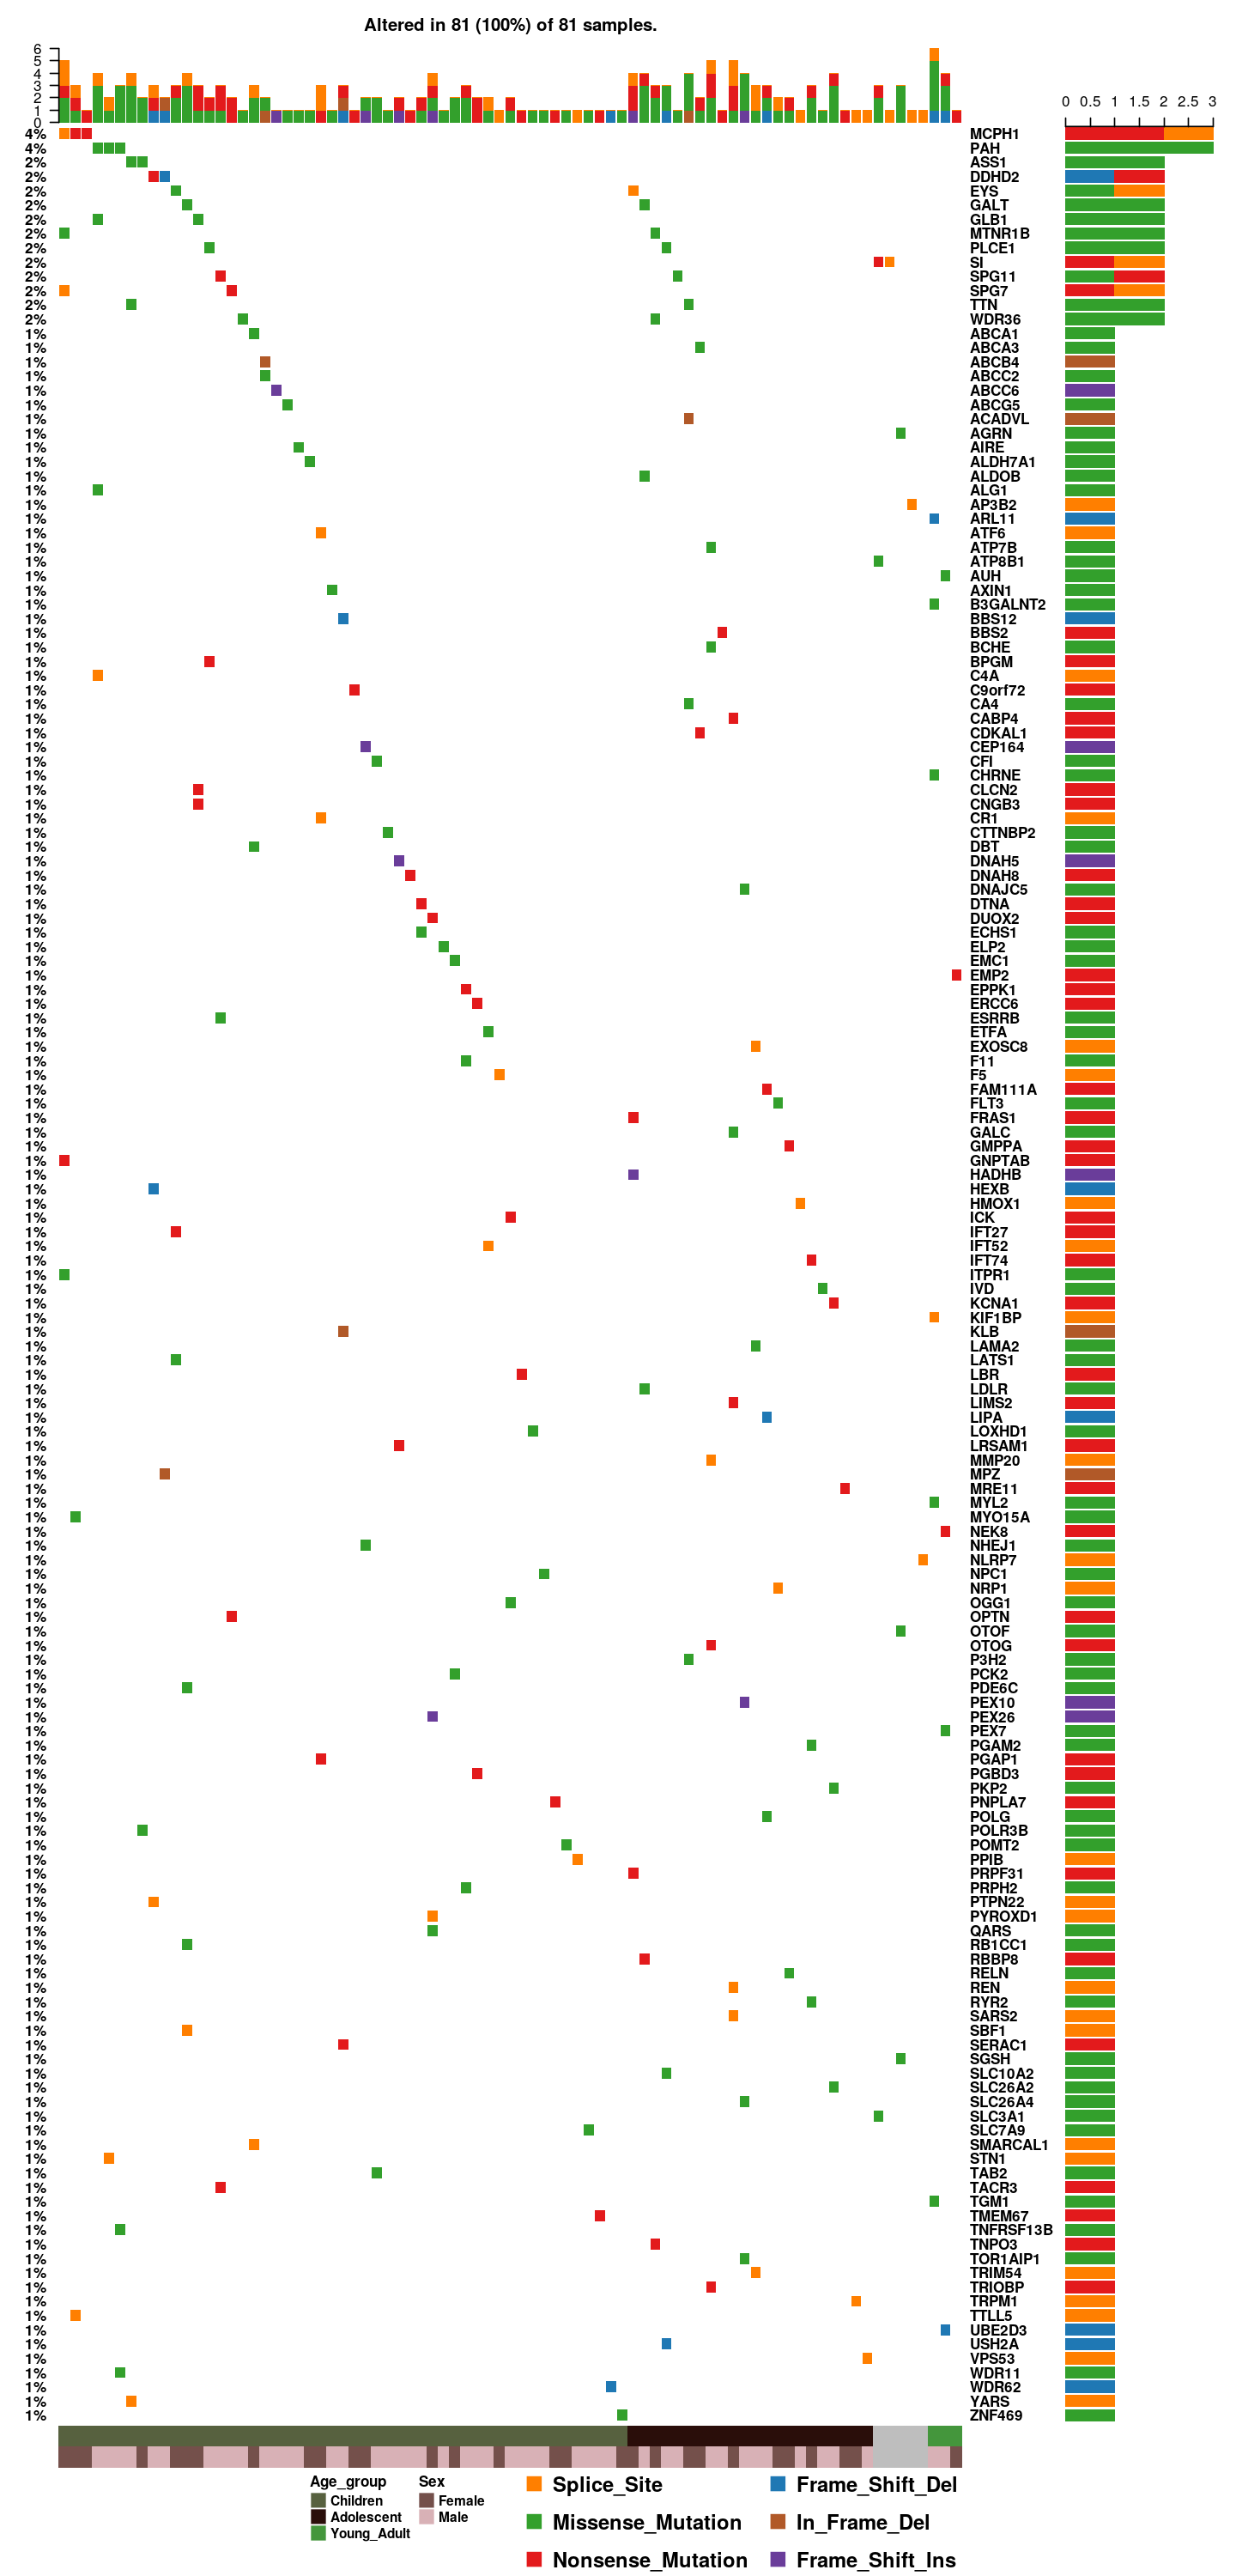

In [44]:
options(repr.plot.width=12, repr.plot.height=25)
oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = FALSE,
        clinicalFeatures = c("Age_group","Sex"))

In [45]:
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_oncoplot_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=25, width=12)
oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        sortByAnnotation = TRUE,
        writeMatrix = FALSE,
        clinicalFeatures = c("Age_group","Sex"))
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_oncoplot_01.svg"

png 
  2

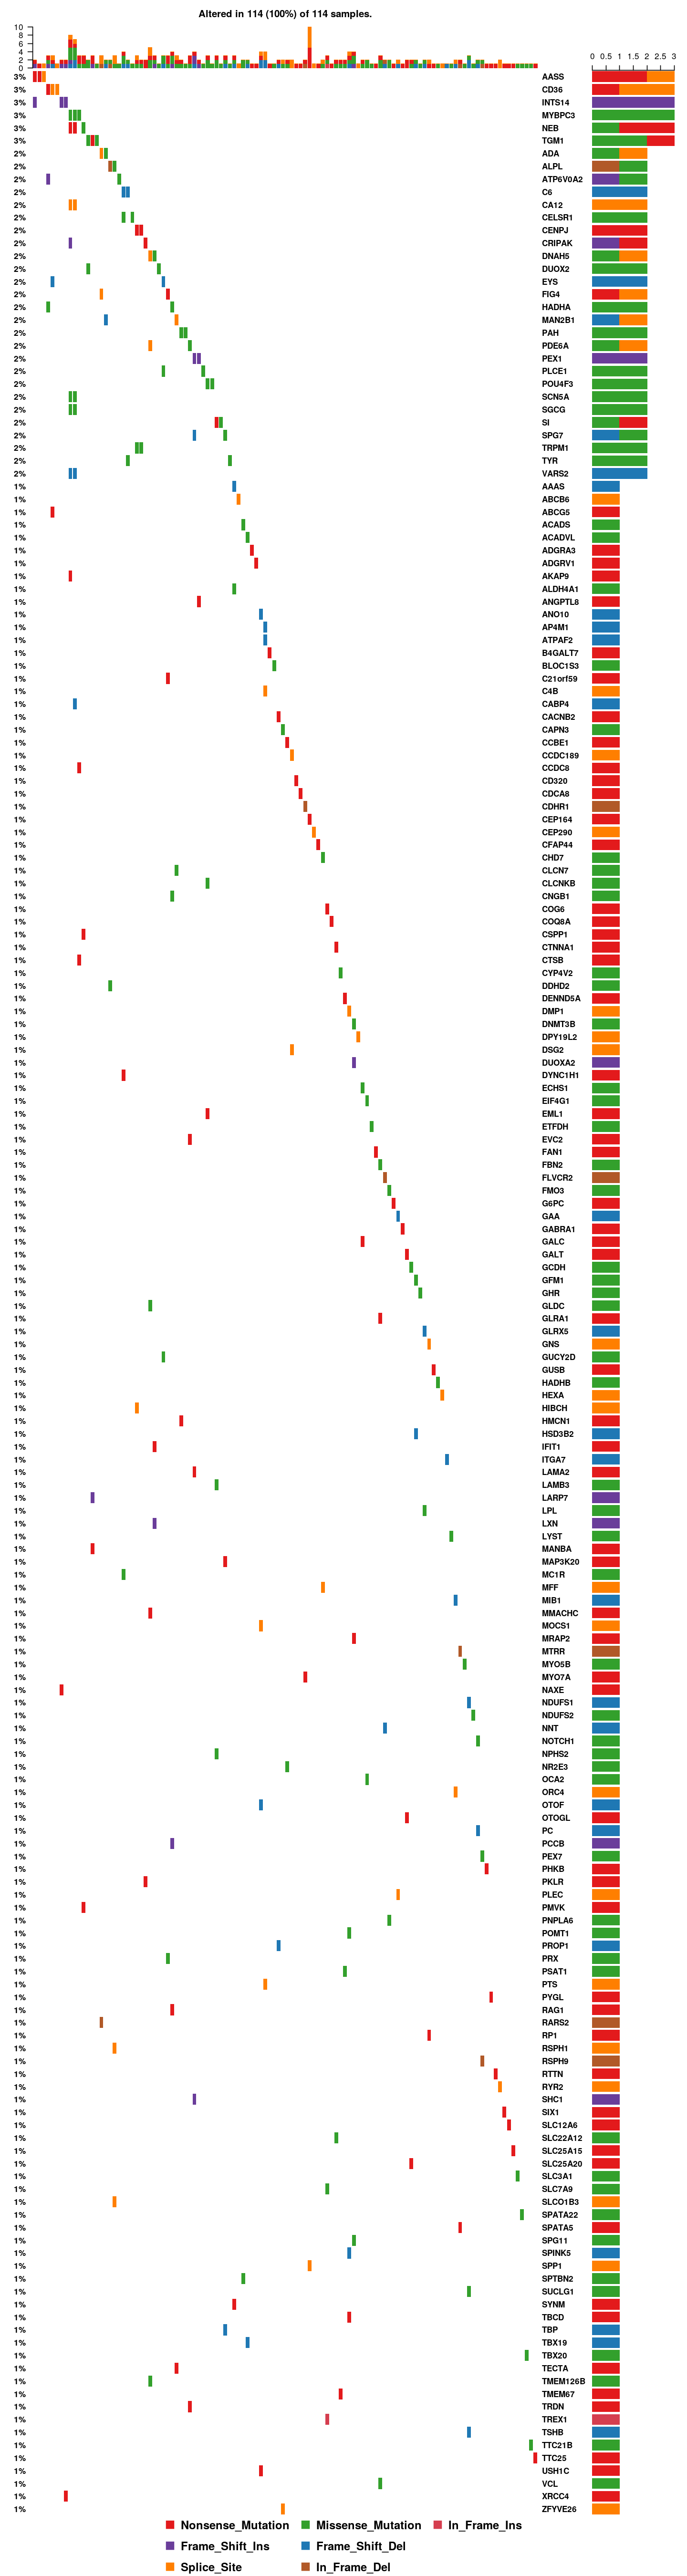

In [46]:
options(repr.plot.width=12, repr.plot.height=25)
oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)

In [46]:
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_oncoplot_02.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=25, width=12)

oncoplot(maf = dfx,bgCol = "white",
        top = total_genes,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_oncoplot_02.svg"

png 
  2

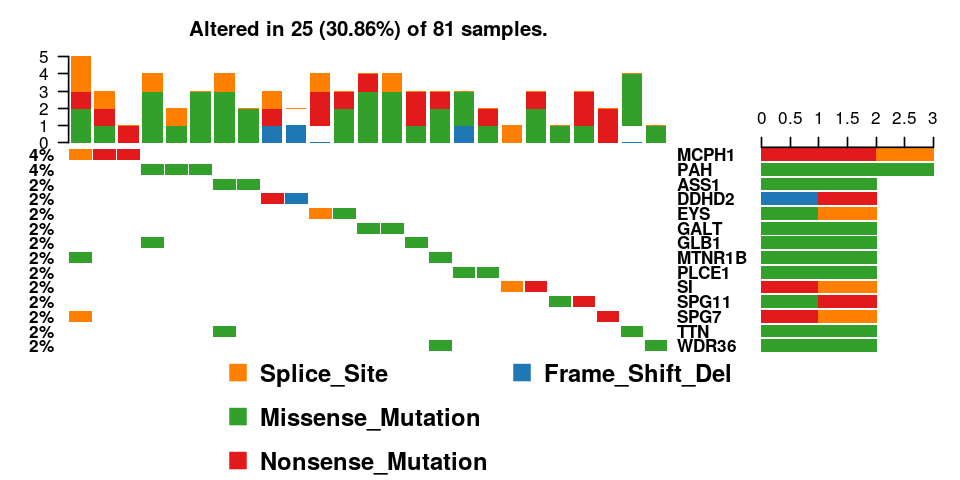

In [50]:
options(repr.plot.width=8, repr.plot.height=4)
oncoplot(maf = dfx,bgCol = "white",
        top = gf_sx,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)

In [51]:
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_oncoplot_03.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=9, width=12)

oncoplot(maf = dfx,bgCol = "white",
        top = gf_sx,
        
        fontSize = 10,
        SampleNamefontSize = 8,
        titleFontSize = 12,
        legendFontSize = 14,
        annotationTitleFontSize = 10,
        annotationFontSize = 9,
        
        drawColBar = TRUE,
        drawRowBar = TRUE,
        showTumorSampleBarcodes = F,
        writeMatrix = FALSE)
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_oncoplot_03.svg"

png 
  2

### Plot Transition and Transversions
returns a list of summarized tables in various ways. Summarized data can also be visualized as a boxplot showing overall distribution of six different conversions and as a stacked barplot showing fraction of conversions in each sample.

In [52]:
dfx

An object of class  MAF 
                   ID summary  Mean Median
 1:        NCBI_Build   37;38    NA     NA
 2:            Center    <NA>    NA     NA
 3:           Samples      81    NA     NA
 4:            nGenes     161    NA     NA
 5:   Frame_Shift_Del       8 0.099      0
 6:   Frame_Shift_Ins       6 0.074      0
 7:      In_Frame_Del       4 0.049      0
 8: Missense_Mutation      88 1.086      1
 9: Nonsense_Mutation      44 0.543      0
10:       Splice_Site      29 0.358      0
11:             total     179 2.210      2

NULL

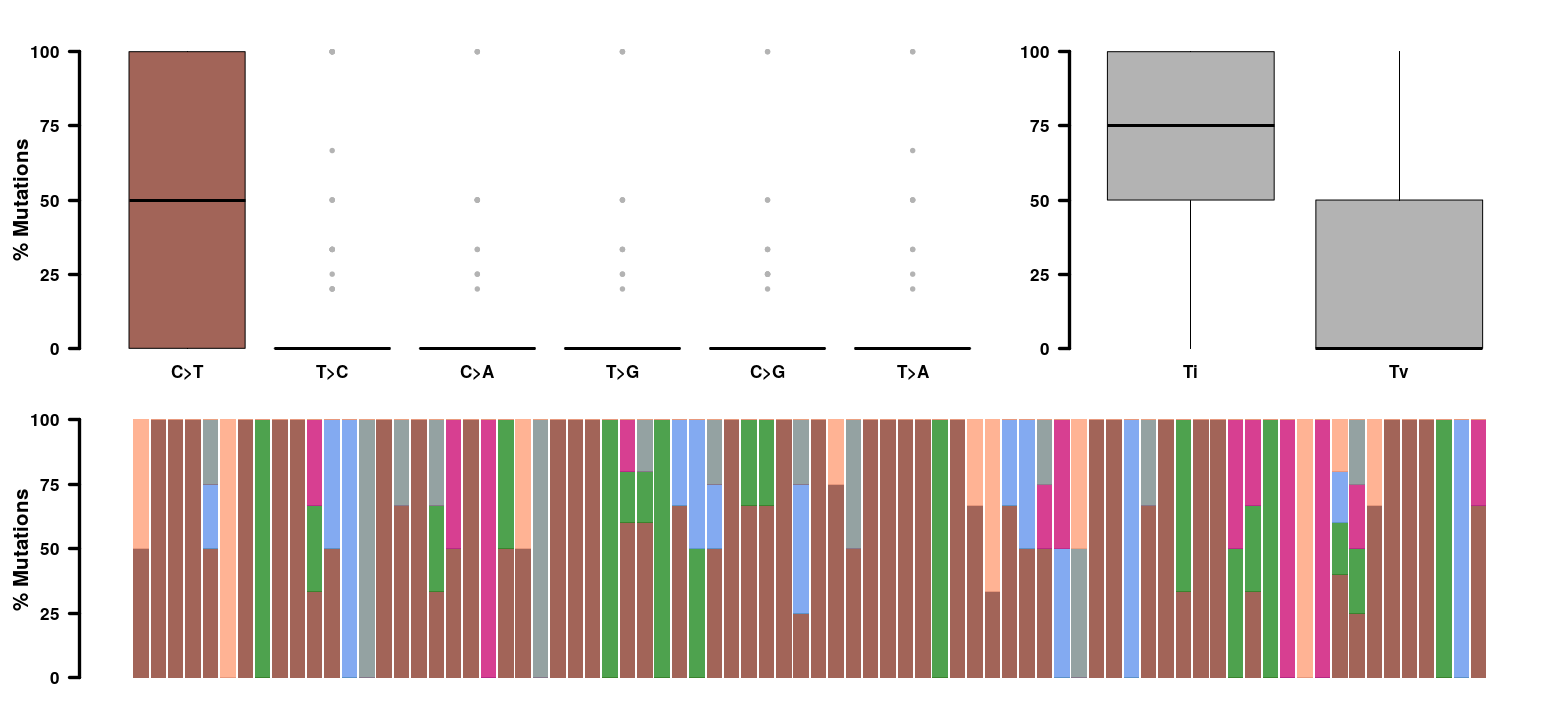

In [53]:
options(repr.plot.width=13,repr.plot.height=6)
dfx.titv = titv(maf = dfx, plot = F, useSyn = T  )
plotTiTv(res = dfx.titv ,showBarcodes = F, textSize=5)

In [54]:
total_genes

[1] 161

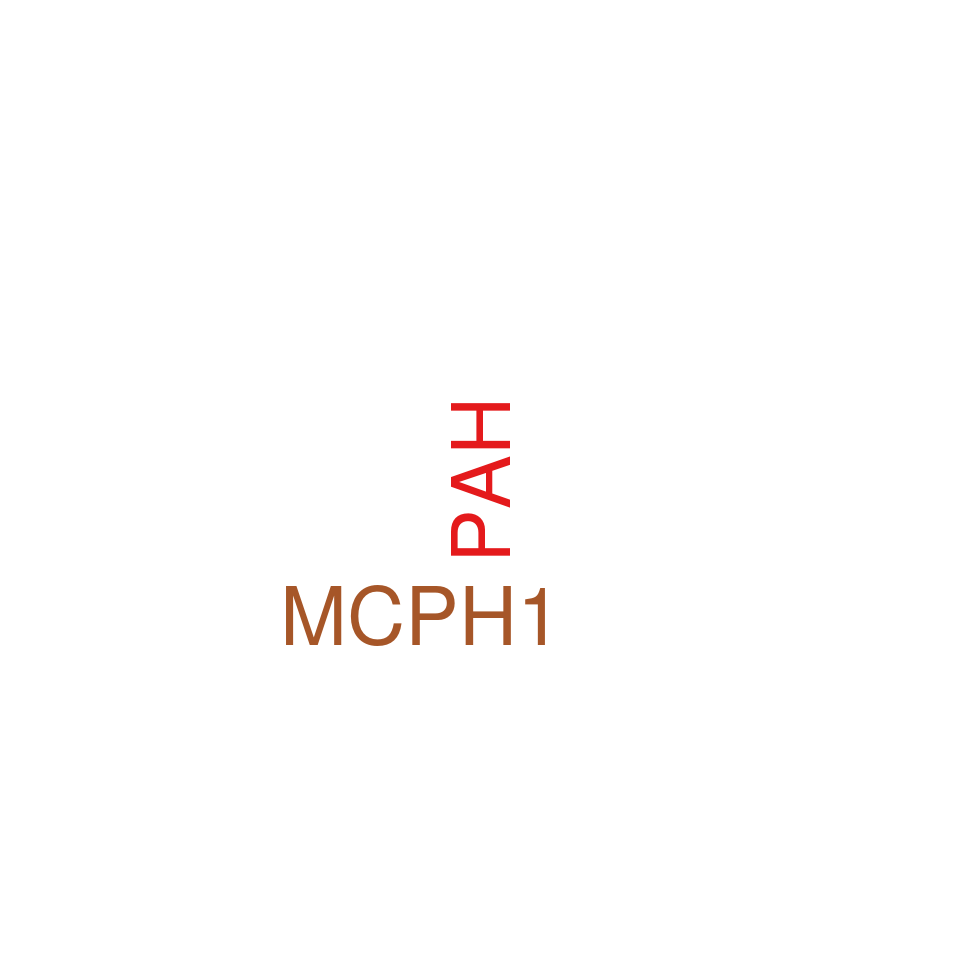

In [58]:
options(repr.plot.width=8, repr.plot.height=8)
set.seed(42)
geneCloud(input = dfx, top=total_genes, minMut =0)

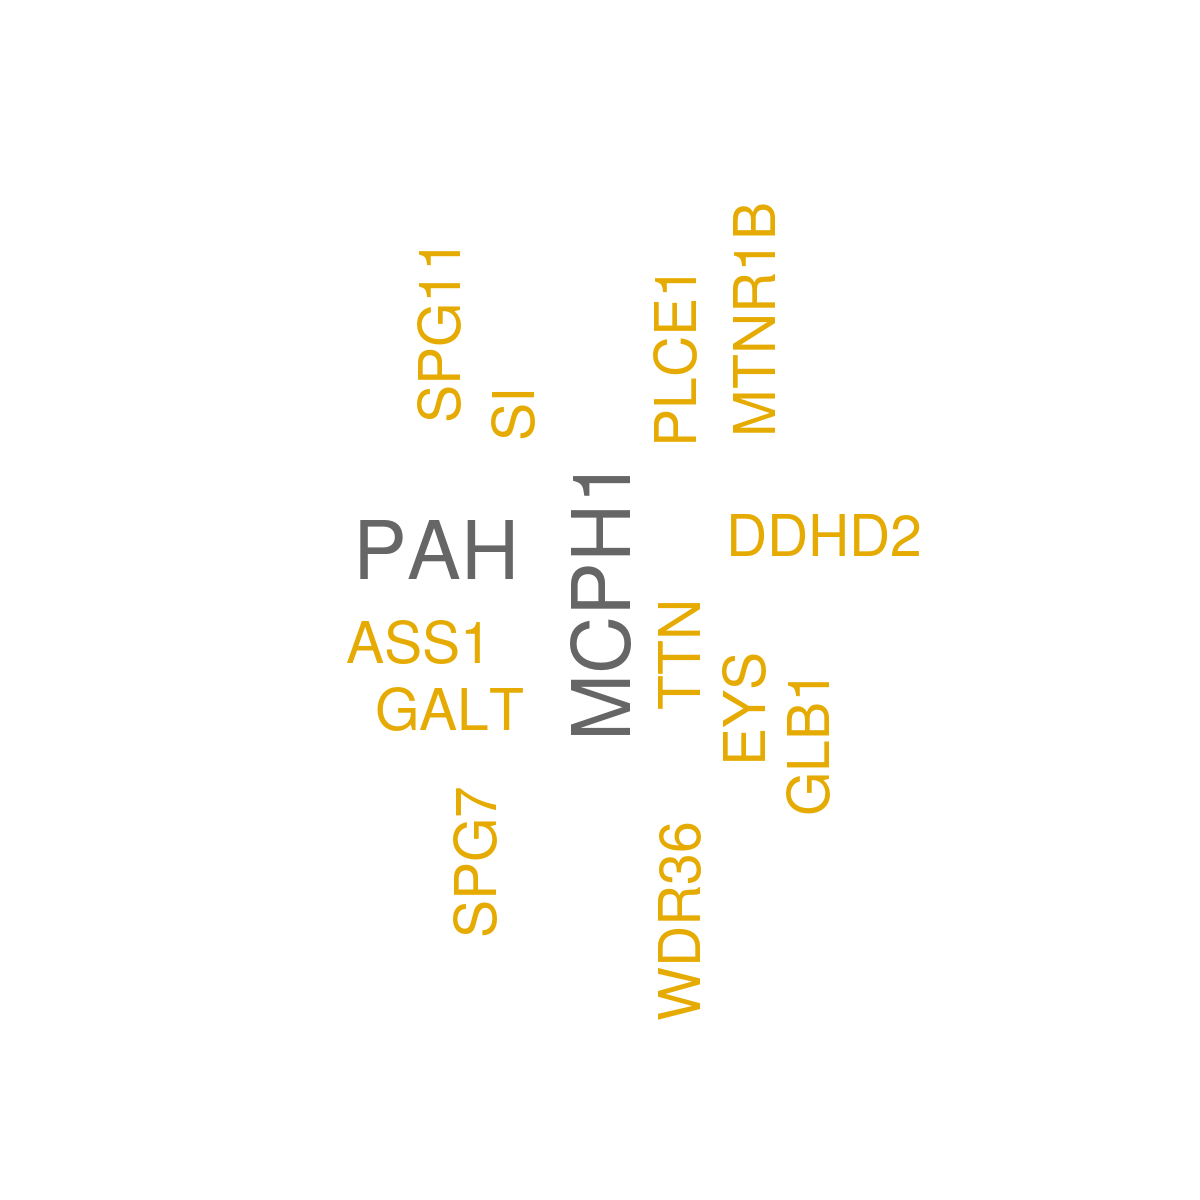

In [64]:
options(repr.plot.width=10, repr.plot.height=10)
gs = getGeneSummary(dfx)
gs = gs[MutatedSamples >=2]
set.seed(50)
wordcloud::wordcloud(words = gs[, Hugo_Symbol], gs[,MutatedSamples], 
           min.freq = 1,
           max.words=200, 
          random.order=FALSE, 
          rot.per=0.45, 
          colors=brewer.pal(8, "Dark2"))

In [65]:
options(repr.plot.width=10, repr.plot.height=10)

out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_genecloud_01.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=9, width=12)
gs = getGeneSummary(dfx)
gs = gs[MutatedSamples >=2]
set.seed(50)
wordcloud::wordcloud(words = gs[, Hugo_Symbol], gs[,MutatedSamples], 
          min.freq = 1,
          # max.words=200, 
          random.order=FALSE, 
          rot.per=0.45, 
          colors=brewer.pal(8, "Dark2"))
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_genecloud_01.svg"

png 
  2

In [66]:
options(repr.plot.width=8, repr.plot.height=8)
set.seed(42)

out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_genecloud_02.svg')
paste0("Saving : ", out_svg)
svg(out_svg, height=9, width=12)
geneCloud(input = dfx, top=total_genes)
dev.off()

[1] "Saving : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_genecloud_02.svg"

png 
  2

##  Drug Interactions
- plot shows potential druggable gene categories along with upto top 5 genes involved in them. 
- One can also extract information on drug-gene interactions. 
- [check this documentation](https://bioconductor.org/packages/release/bioc/vignettes/maftools/inst/doc/maftools.html#98_drug-gene_interactions)

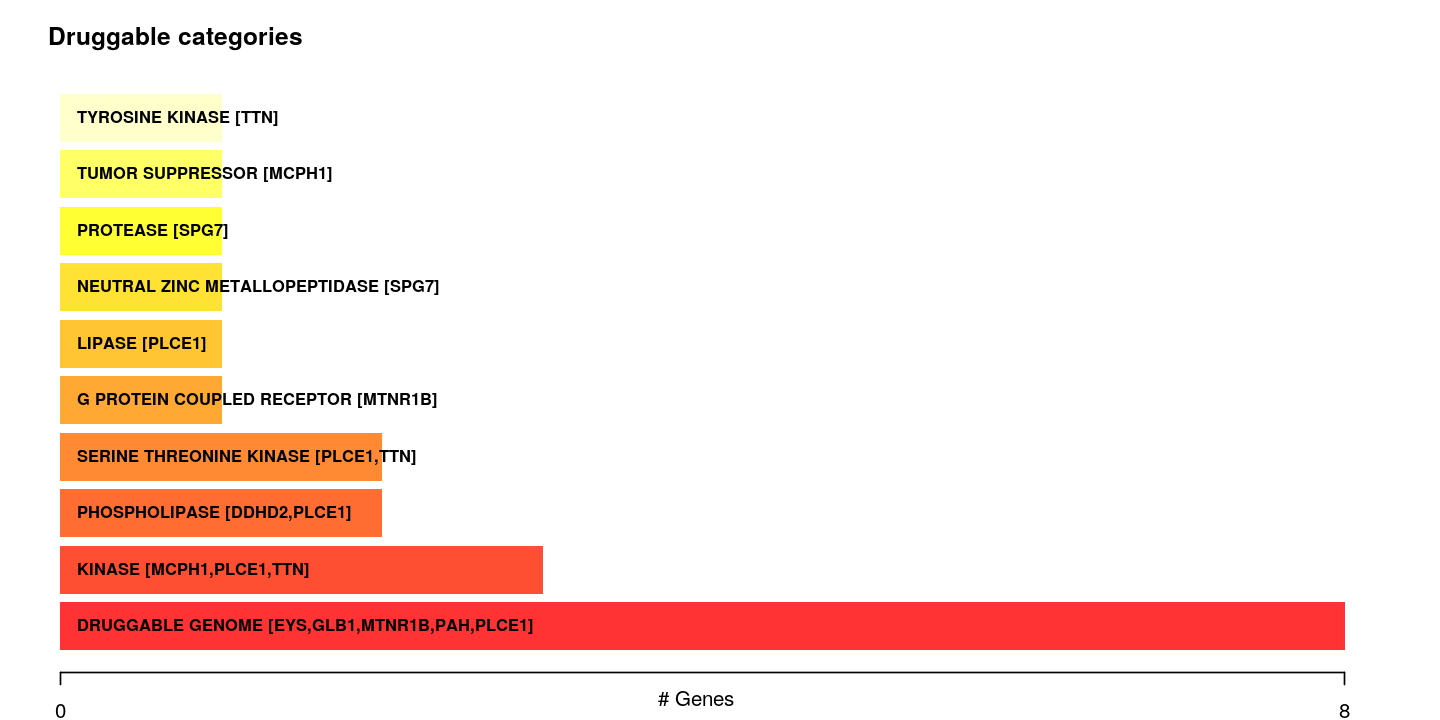

In [67]:
options(repr.plot.height=6, repr.plot.width=12)
dfx_drug =maftools::drugInteractions(dfx, top=gf_sx )

In [68]:
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_drugInteractions_01.svg')
paste0("Saving drug interaction svg to : ", out_svg)
svg(out_svg, height=9, width=12)
dfx_drug =maftools::drugInteractions(dfx, top=gf_sx)
dev.off()

[1] "Saving drug interaction svg to : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_drugInteractions_01.svg"

png 
  2

## Oncogenic Pathways

In [69]:
options(repr.plot.width=6, repr.plot.height=4)
op = OncogenicPathways(dfx)

Pathway alteration fractions


       Pathway  N n_affected_genes fraction_affected
 1:      Hippo 38                1        0.02631579
 2:        WNT 68                1        0.01470588
 3:    RTK-RAS 85                1        0.01176471
 4: Cell_Cycle 15                0        0.00000000
 5:        MYC 13                0        0.00000000
 6:      NOTCH 71                0        0.00000000
 7:       NRF2  3                0        0.00000000
 8:       PI3K 29                0        0.00000000
 9:   TGF-Beta  7                0        0.00000000
10:       TP53  6                0        0.00000000


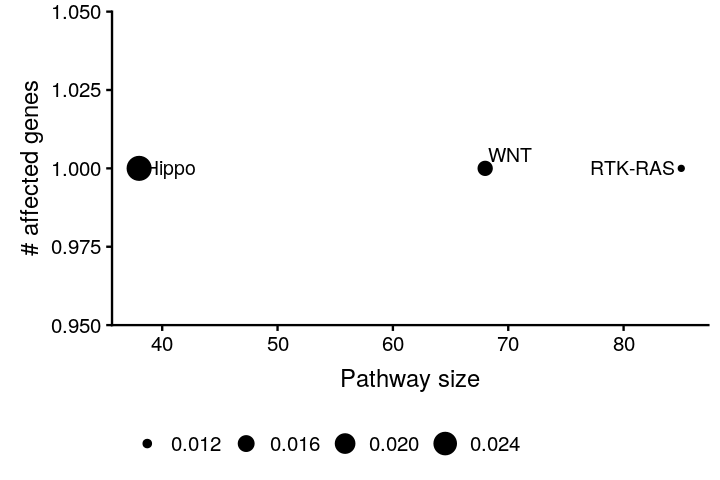

In [70]:
op

In [71]:
out_svg = paste0('../Suggesting_Variants/plots/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_OncogenicPathway_01.svg')
paste0("Saving drug interaction svg to : ", out_svg)

svg(out_svg, height=9, width=12)
op
dev.off()

[1] "Saving drug interaction svg to : ../Suggesting_Variants/plots/Suggesting_TT-Ewings_Sarcoma_OncogenicPathway_01.svg"

png 
  2

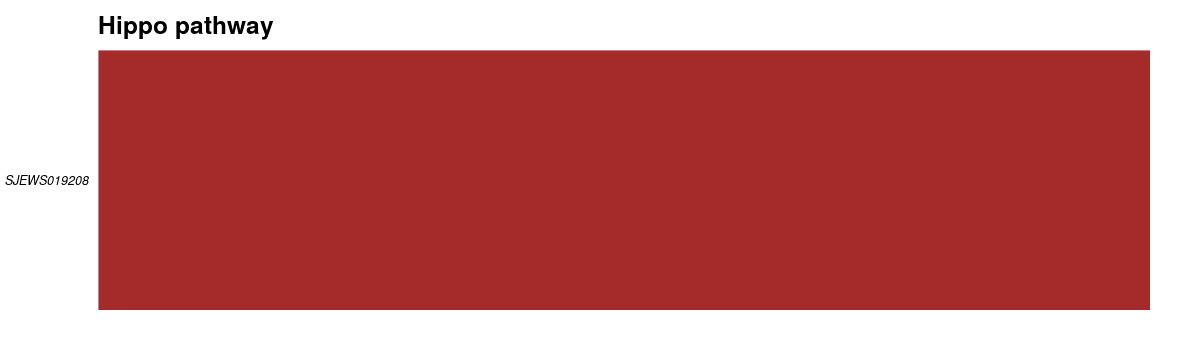

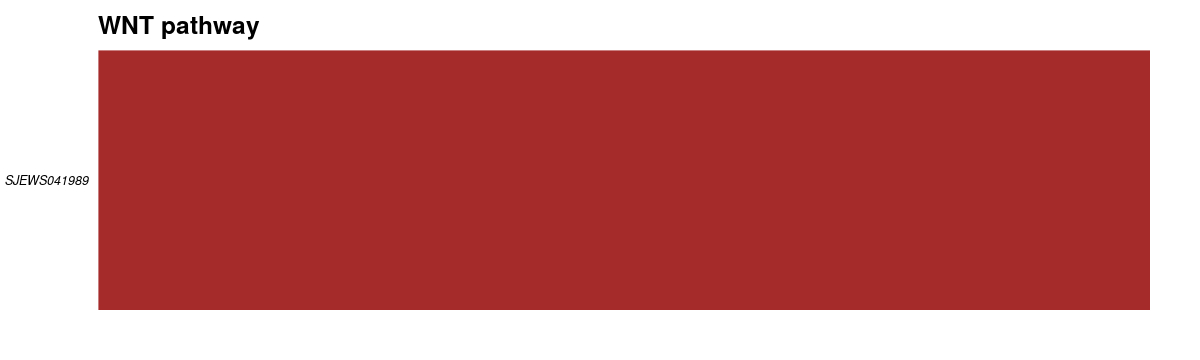

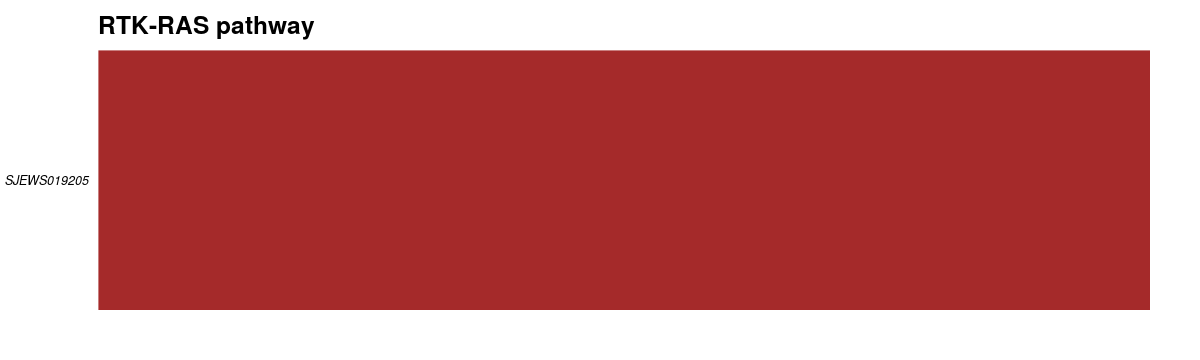

In [72]:
options(repr.plot.width=10, repr.plot.height=3)
for( i in 1:length( op$data$Pathway ) ){
    pway = op$data$Pathway[i]
    PlotOncogenicPathways(dfx,pway, fullPathway = F, removeNonMutated = T)
}

In [73]:
pathway_lst = c("Cell_Cycle","Hippo","MYC","NOTCH","NRF2","PI3K","RTK-RAS","TGF-Beta","TP53","WNT")

In [74]:
# options(repr.plot.width=10, repr.plot.height=8)
# PlotOncogenicPathways(dfx,pathway_lst[1], fullPathway = T)

In [75]:
# options(repr.plot.width=10, repr.plot.height=3)
# PlotOncogenicPathways(dfx,pathway_lst[2], fullPathway = T)

In [76]:
# options(repr.plot.width=10, repr.plot.height=9)
# PlotOncogenicPathways(dfx,pathway_lst[4], fullPathway = T)

## Save the MAF file

In [77]:
out_file = paste0('../Suggesting_Variants/maf_res/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)) )
paste0("Saving MAF file to : ", out_file)
maftools::write.mafSummary(dfx, out_file)

[1] "Saving MAF file to : ../Suggesting_Variants/maf_res/Suggesting_TT-Ewings_Sarcoma"

In [78]:
out_file = paste0('../Suggesting_Variants/maf_res/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),'_drugInteractions.tsv')
paste0("Saving drug Interactions data to : ", out_file)
write.table(dfx_drug, out_file, sep="\t", row.names = F, quote = F)

[1] "Saving drug Interactions data to : ../Suggesting_Variants/maf_res/Suggesting_TT-Ewings_Sarcoma_drugInteractions.tsv"

## Save the data frames

In [79]:
out_file = paste0('../Suggesting_Variants/maf_res/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),"_mutation_data.tsv")
paste0("Saving mutation data to : ", out_file)
write.table(df_ss, file = out_file, sep="\t", quote = F, row.names = F)

[1] "Saving mutation data to : ../Suggesting_Variants/maf_res/Suggesting_TT-Ewings_Sarcoma_mutation_data.tsv"

In [80]:
out_file = paste0('../Suggesting_Variants/maf_res/Suggesting_','TT-',gsub("'","", gsub(' ','_',ttype)),"_clinical_data.tsv")
paste0("Saving clinical data to : ", out_file)
write.table(df2_ss, file =out_file, sep="\t", quote = F, row.names = F)

[1] "Saving clinical data to : ../Suggesting_Variants/maf_res/Suggesting_TT-Ewings_Sarcoma_clinical_data.tsv"

In [81]:
version

               _                           
platform       x86_64-redhat-linux-gnu     
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.0                         
year           2018                        
month          04                          
day            23                          
svn rev        74626                       
language       R                           
version.string R version 3.5.0 (2018-04-23)
nickname       Joy in Playing              

In [82]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: Fedora 24 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] wordcloud_2.6       RColorBrewer_1.1-2  knitr_1.22         
 [4] corrplot_0.84       maftools_1.8.0      Biobase_2.42.0     
 [7] BiocGenerics_0.28.0 vcd_1.4-4           ggpubr_0.2         
[10] magrittr_1.5        xtable_1.8-4        mixOmics_6.6.2     
[13] MASS_7.3-51.1       factoextra_1.0.5